In [2]:
import rdkit
from multiprocessing import freeze_support
from rdkit import Chem
from mordred import Calculator, descriptors
import pandas as pd
import numpy as np

RDKit WARNING: [11:30:34] Enabling RDKit 2019.09.1 jupyter extensions


In [3]:
#converting the datasets from sdf and importing them to Pandas

if __name__ == "__main__":
    freeze_support()

    sdf = Chem.SDMolSupplier("compound_set1.sdf")

    mols = []

    for mol in sdf:
        if mol:
            mols.append(mol)

    # Create Calculator
    calc = Calculator(descriptors)

    # map method calculate multiple molecules (return generator)
    print(list(calc.map(mols)))

    # pandas method calculate multiple molecules (return pandas DataFrame)
    #print(calc.pandas(mols))

    # save data frame
    calc.pandas(mols).to_csv("compound_set1.csv")

if __name__ == "__main__":
    freeze_support()

    sdf = Chem.SDMolSupplier("compound_set2.sdf")

    mols = []

    for mol in sdf:
        if mol:
            mols.append(mol)

    # Create Calculator
    calc = Calculator(descriptors)

    # map method calculate multiple molecules (return generator)
    print(list(calc.map(mols)))

    # pandas method calculate multiple molecules (return pandas DataFrame)
    #print(calc.pandas(mols))

    # save data frame
    calc.pandas(mols).to_csv("compound_set2.csv")



if __name__ == "__main__":
    freeze_support()

    sdf = Chem.SDMolSupplier("compound_set3.sdf")

    mols = []

    for mol in sdf:
        if mol:
            mols.append(mol)

    # Create Calculator
    calc = Calculator(descriptors)

    # map method calculate multiple molecules (return generator)
    print(list(calc.map(mols)))

    # pandas method calculate multiple molecules (return pandas DataFrame)
    #print(calc.pandas(mols))

    # save data frame
    calc.pandas(mols).to_csv("compound_set3.csv")

C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=10000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=10000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=10000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
df1= pd.read_csv("compound_set1.csv")
df2 = pd.read_csv("compound_set2.csv")
df3 = pd.read_csv("compound_set3.csv")
assert list(df1.columns) == list(df2.columns) == list(df3.columns)

C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,143,152,161,170,179,188,197,206,215,224,233,234,235,236,237,238,239,240,241,242,342,343,344,345,346,347,348,349,350,359,368,377,386,395,404,413,422,431,440,449,450,451,452,453,454,455,456,457,465,473,481,489,497,505,513,521,529,537,545,546,547,548,549,550,551,552,553,561,569,577,585,593,601,609,617,625,633,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,816,817,921,922,923,92

In [5]:
df = pd.concat([df1, df2, df3], ignore_index=1)

#drop old indices
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Lipinski', axis = 1)
df = df.drop('GhoseFilter', axis = 1)
#drop rows that contains multiple paths thingy
df = df.drop(df[df['SpAbs_A'].str.contains('multiple', na=False)].index.tolist())
df = df.drop(df[df['AATS8dv'].str.contains('invalid', na=False)].index.tolist())
df = df.drop(df[df['ATSC0c'].str.contains('gasteiger', na=False)].index.tolist()) 
df = df.apply(pd.to_numeric, errors = 'coerce')
df = df.dropna(axis = 1)
df = df.dropna(axis = 0)
df.drop(112)

In [199]:
#extract the key descriptors for our dependent variables, leave the rest as explanatory variables
mordred_x = df.drop(df.columns[df.columns.get_loc('nAromAtom'):df.columns.get_loc('nX')+1], axis = 1)

mordred_y = df.iloc[:,df.columns.get_loc('nAromAtom'):df.columns.get_loc('nX')+1].drop(['nSpiro' ,'nBridgehead'], axis = 1)

In [11]:
import matplotlib.pyplot as plt
import matplotlib

Text(0.5, 0, 'feature')

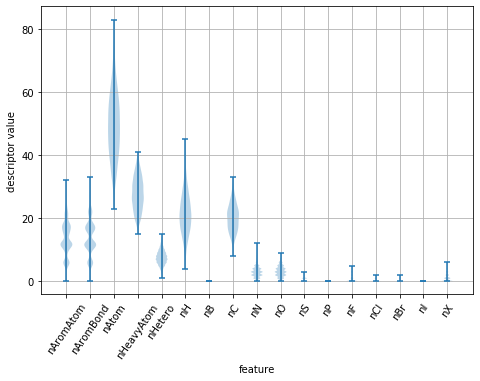

In [12]:
# Create a figure instance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.grid()
plt.violinplot(mordred_y.transpose())
plt.xticks(np.arange(1, 18),list(mordred_y.columns), rotation = 55 )
plt.ylabel('descriptor value')
plt.xlabel('feature')

Text(0.5, 0, 'feature')

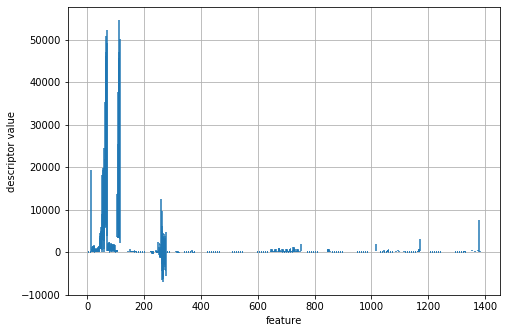

In [62]:
# Create a figure instance
fig = plt.figure()
mordred_x_plot = mordred_x.drop('VR1_A', axis = 1)
ax = fig.add_axes([0,0,1,1])
plt.grid()
plt.violinplot(mordred_x_plot.transpose())
# plt.xticks(np.arange(1, 18),list(mordred_x.columns), rotation = 55 )
plt.ylabel('descriptor value')
plt.xlabel('feature')


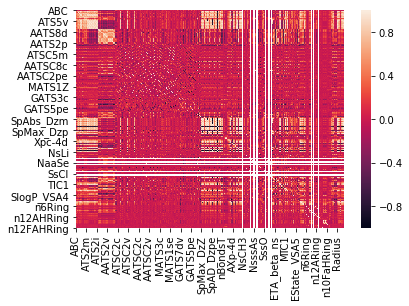

In [156]:
import seaborn as sns
sns.heatmap(mordred_x.corr())

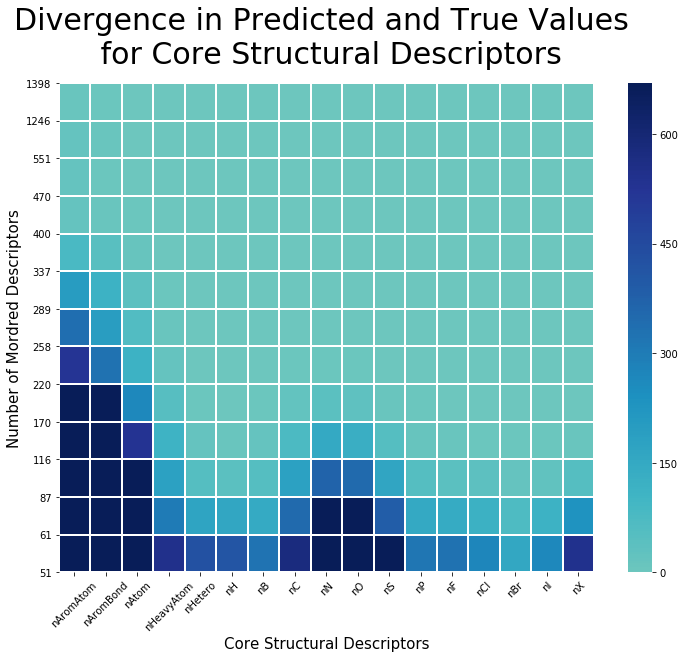

In [198]:
x_output = pd.read_csv("x_output.csv")
y_output = pd.read_csv("y_output.csv")

x_output = x_output.drop('Unnamed: 0', axis = 1)

x_output.columns = mordred_y.columns

# x_output = x_output.transpose()

import seaborn as sns

# from scipy.ndimage.filters import gaussian_filter
# sns.heatmap(gaussian_filter(x_output, sigma=1), vmax = 400, cmap = 'YlGnBu', center = 100)
plt.figure( figsize = (12,9))
sns.heatmap(gaussian_filter(x_output, sigma = 1), vmax = (mordred_x.shape[0]/5), cmap = 'YlGnBu', center = 100, xticklabels =list(mordred_y.columns), yticklabels = y_output['0'], linewidths = 1)
# plt.xticks(np.arange(1, 18),list(mordred_y.columns), rotation = 45)
plt.yticks(np.arange(1, 15),y_output['0'])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Divergence in Predicted and True Values \n for Core Structural Descriptors", size = 30, pad = 20)
plt.ylabel('Number of Mordred Descriptors', size = 15)
plt.xlabel('Core Structural Descriptors', size = 15)
plt.savefig('hoax.png')